In [0]:
from __future__ import print_function

from six.moves import cPickle as pickle
import numpy as np
import os
from PIL import Image

from skimage.transform import resize
from imageio import imread
import platform
from sklearn.metrics import f1_score

In [0]:
def categories_label(categories_conf):
  return map(lambda x: x[0], categories_conf)

In [0]:
def load_pictures(conf_data, path, dtype=np.float32, subtract_mean=True):
  categories_label_training_dict = {category: i for i,category in enumerate(categories_label(conf_data))}

  X_result = []
  y_result = []
  for category, num_images in conf_data:
    # To figure out the filenames we need to open the boxes file    

    X_result_block = np.zeros((num_images, 3, 224, 224), dtype=dtype)
    y_result_block = categories_label_training_dict[category] * np.ones(num_images, dtype=np.int64)

    file_path = os.path.join(path, category) 

    for j, filename in enumerate(os.listdir(file_path)):
      img_file = os.path.join(file_path, filename)
      img = imread(img_file) 
      img = resize(img,(224,224,3))
      d = np.asarray(img)
      X_result_block[j] = d.transpose(2, 0, 1)
    X_result.append(X_result_block)
    y_result.append(y_result_block)

  X_result = np.concatenate(X_result, axis=0)

  mean_image = np.mean(X_result, axis=0)
  X_result -= mean_image[None]
  
  X_result = X_result.transpose(0,2,3,1).astype("float")

  y_result = np.concatenate(y_result, axis=0)
  y_result = np.array(y_result)

  return X_result, y_result

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
artgraffv4_train = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/train'
artgraffv4_test = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/test'
artgraffv4_val = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/val'

In [0]:
categories_training = [('David_Choe',128),('Os_gemeos',147), ('Eduardo_Kobra',94), ('Pez',77), ('Toxicomano',95)]
X_tr, y_tr = load_pictures(categories_training, artgraffv4_train)

In [7]:
X_tr.shape

(541, 224, 224, 3)

In [0]:
categories_test = [('David_Choe',16),('Os_gemeos',12), ('Eduardo_Kobra',10), ('Pez',11), ('Toxicomano',21)]
X_ts, y_ts = load_pictures(categories_test, artgraffv4_test)

In [0]:
categories_val = [('David_Choe',10),('Os_gemeos',13), ('Eduardo_Kobra',14), ('Pez',14), ('Toxicomano',21)]
X_va, y_va = load_pictures(categories_val, artgraffv4_val)

In [10]:
print('Training data shape: ', X_tr.shape)
print('Training labels shape: ', y_tr.shape)
print('Test data shape: ', X_ts.shape)
print('Test labels shape: ', y_ts.shape)
print('Validation data shape: ', X_va.shape)
print('Validation labels shape: ', y_va.shape)

Training data shape:  (541, 224, 224, 3)
Training labels shape:  (541,)
Test data shape:  (70, 224, 224, 3)
Test labels shape:  (70,)
Validation data shape:  (72, 224, 224, 3)
Validation labels shape:  (72,)


In [0]:
from __future__ import print_function

import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

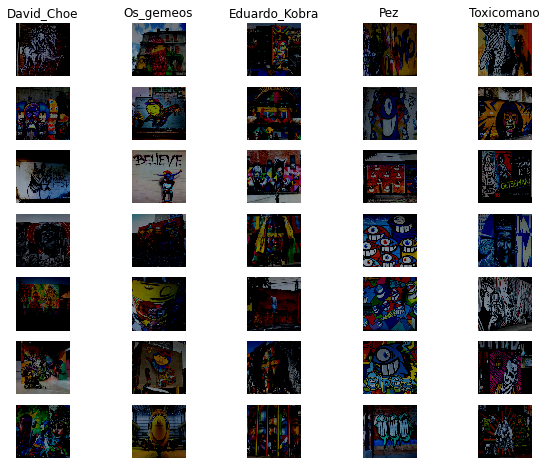

In [12]:
classes = ['David_Choe','Os_gemeos','Eduardo_Kobra','Pez','Toxicomano']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_tr == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_tr[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))
X_ts = np.reshape(X_ts, (X_ts.shape[0], -1))
X_va = np.reshape(X_va, (X_va.shape[0], -1))
print(X_tr.shape, X_ts.shape)

(541, 150528) (70, 150528)


In [0]:
import numpy as np
import sys
from collections import Counter

if sys.version_info >= (3, 0):
    def xrange(*args, **kwargs):
        return iter(range(*args, **kwargs))

class KNearestNeighbor(object):

  def __init__(self):
    pass

  def train(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1, num_loops=0):
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      for j in xrange(num_train):
        dists[i, j] = np.linalg.norm(self.X_train[j] - X[i])
    return dists

  def compute_distances_one_loop(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      dists[i, :] = np.linalg.norm((self.X_train - X[i]), axis=-1)
    return dists

  def compute_distances_no_loops(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 
    dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(self.X_train**2, axis=1) - 2 * X.dot(self.X_train.T))
    return dists

  def predict_labels(self, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in xrange(num_test):
      closest_y = []

      top_k_indx = np.argsort(dists[i])[:k]
      closest_y = self.y_train[top_k_indx]

      vote = Counter(closest_y)
      count = vote.most_common()
      y_pred[i] = count[0][0]
    return y_pred


In [0]:
classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)

In [16]:
dists = classifier.compute_distances_two_loops(X_ts)
print(dists.shape)

(70, 541)


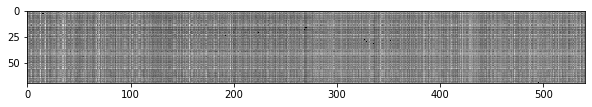

In [17]:
plt.imshow(dists, interpolation='none')
plt.show()

In [18]:
num_test = 70

y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_ts)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 26 / 70 correct => accuracy: 0.371429


In [19]:

dists_one = classifier.compute_distances_one_loop(X_ts)

difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [20]:
dists_two = classifier.compute_distances_no_loops(X_ts)

difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [21]:
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_ts)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_ts)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_ts)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 16.896057 seconds
One loop version took 21.733875 seconds
No loop version took 0.659908 seconds


In [0]:
X_e = X_tr[0:-1,]
y_e = y_tr[0:-1]

In [23]:
X_e.shape

(540, 150528)

In [24]:
y_e.shape

(540,)

In [25]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50]

X_train_folds = []
y_train_folds = []


X_train_folds = np.split(X_e, num_folds)
y_train_folds = np.split(y_e, num_folds)

k_to_accuracies = {}
num_split = X_tr.shape[0] / num_folds
acc_k = np.zeros((len(k_choices), num_folds), dtype=np.float)

for ik ,k in enumerate(k_choices):
    for i in range(num_folds):
        train_set = np.concatenate((X_train_folds[:i]+X_train_folds[i+1:]))
        label_set = np.concatenate((y_train_folds[:i]+y_train_folds[i+1:]))
        classifier.train(train_set, label_set)
        y_pred_fold = classifier.predict(X_train_folds[i], k=k, num_loops=0)
        num_correct = np.sum(y_pred_fold == y_train_folds[i])
        acc_k[ik, i] = float(num_correct) / num_split
    k_to_accuracies[k] = acc_k[ik]

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.157116
k = 1, accuracy = 0.536044
k = 1, accuracy = 0.304991
k = 1, accuracy = 0.036969
k = 1, accuracy = 0.009242
k = 3, accuracy = 0.101664
k = 3, accuracy = 0.591497
k = 3, accuracy = 0.314233
k = 3, accuracy = 0.018484
k = 3, accuracy = 0.009242
k = 5, accuracy = 0.092421
k = 5, accuracy = 0.600739
k = 5, accuracy = 0.304991
k = 5, accuracy = 0.000000
k = 5, accuracy = 0.009242
k = 8, accuracy = 0.055453
k = 8, accuracy = 0.637708
k = 8, accuracy = 0.341959
k = 8, accuracy = 0.000000
k = 8, accuracy = 0.000000
k = 10, accuracy = 0.046211
k = 10, accuracy = 0.609982
k = 10, accuracy = 0.332717
k = 10, accuracy = 0.000000
k = 10, accuracy = 0.000000
k = 12, accuracy = 0.036969
k = 12, accuracy = 0.619224
k = 12, accuracy = 0.314233
k = 12, accuracy = 0.000000
k = 12, accuracy = 0.000000
k = 15, accuracy = 0.009242
k = 15, accuracy = 0.573013
k = 15, accuracy = 0.323475
k = 15, accuracy = 0.000000
k = 15, accuracy = 0.000000
k = 20, accuracy = 0.000000
k = 20, accu

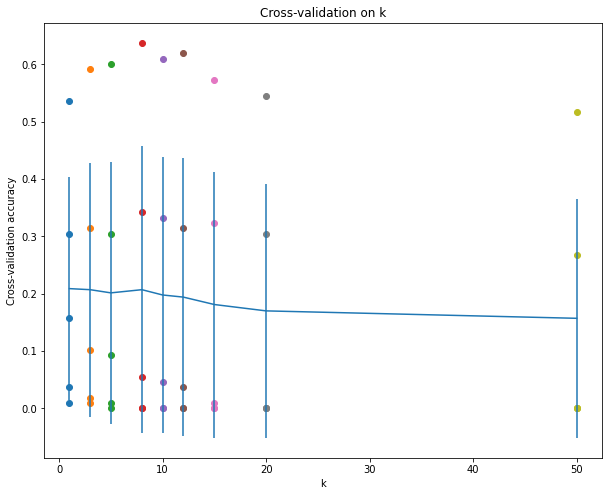

In [26]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [27]:
best_k = 8

classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)
y_test_pred = classifier.predict(X_ts, k=best_k)

num_correct = np.sum(y_test_pred == y_ts)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 15 / 70 correct => accuracy: 0.214286


In [28]:
best_k = 8
num_val = 72
classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)
y_test_pred = classifier.predict(X_va, k=best_k)

num_correct = np.sum(y_test_pred == y_va)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

Got 21 / 72 correct => accuracy: 0.291667


In [30]:
num_correct

21

In [31]:
y_test_pred

array([0., 1., 1., 0., 0., 0., 0., 1., 4., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 2., 0., 1., 0., 0.,
       1., 1., 1., 1., 3., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       4., 0., 1., 1.])

In [32]:
y_va

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [34]:
f1_score(y_va, y_test_pred, average='micro')

0.2916666666666667